In [1]:
# Trabalho com o MNIST - numeros manuscritos
from keras.datasets import mnist
from keras.utils import to_categorical
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


# Carregando o dataset separando os dados de treino e de teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para adicionar o canal de cor
x_treino = x_treino.reshape(len(x_treino), 28, 28, 1)
x_treino_norm = x_treino_norm.reshape(len(x_treino_norm), 28, 28, 1)
x_teste = x_teste.reshape(len(x_teste), 28, 28, 1)
x_teste_norm = x_teste_norm.reshape(len(x_teste_norm), 28, 28, 1)


# Criação do modelo LeNet5
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\Inteli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 48)     │        38,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       307,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
#Compila o modelo
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer=adam)

# Realiza o treinamento do modelo
historico = model.fit(x_treino_norm, y_treino_cat, epochs=15, validation_split=0.2)

model.save('models/modelo_mnist.h5')

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9121 - loss: 0.2822 - val_accuracy: 0.9848 - val_loss: 0.0504
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9845 - loss: 0.0482 - val_accuracy: 0.9862 - val_loss: 0.0465
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9899 - val_loss: 0.0407
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9930 - loss: 0.0235 - val_accuracy: 0.9882 - val_loss: 0.0427
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9897 - val_loss: 0.0378
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9962 - loss: 0.0120 - val_accuracy: 0.9894 - val_loss: 0.0397
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9895 - val_loss: 0.0431
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9966 -

Text(0, 0.5, 'accuracy')

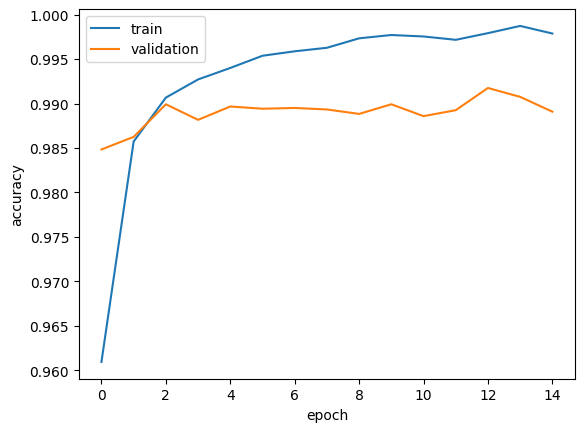

In [4]:
from matplotlib import pyplot as plt

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')